In [1]:
import pandas as pd

df = pd.read_csv("daily-bike-share.csv")

In [2]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'rentals'],
      dtype='object')

In [3]:
# Drop columns that are not relevant for prediction
df = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals']]

categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_categorical = df[categorical_columns]

# Convert columns to categorical data type
df_categorical = df_categorical.astype('category')

# Create dummies
df_dummies = pd.get_dummies(df_categorical)

# Concatenate dummies with the original DataFrame
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_columns, axis=1)

# Split the data into features (X) and target (y)
X = df.drop('rentals', axis=1)
y = df['rentals']

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict using the model
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 114122.8772232185
R-squared: 0.7070793896144253


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def train_and_evaluate_models(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = [
        ("Linear Regression", LinearRegression()),
        ("Random Forest Regression", RandomForestRegressor(n_estimators=100, random_state=42)),
        ("Gradient Boosting Regression", GradientBoostingRegressor(n_estimators=100, random_state=42)),
        ("Support Vector Regression", SVR(kernel='linear')),
        ("XGBoost Regression", XGBRegressor(n_estimators=100, random_state=42))
    ]

    best_model = None
    best_mse = float('inf')

    for model_name, model in models:
        if model_name == "Support Vector Regression":
            # Scale features for SVR
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        print(f'{model_name} - Mean Squared Error: {mse}')

        if mse < best_mse:
            best_mse = mse
            best_model = model_name

    print(f'\nBest Model: {best_model}')
    return best_model

# Usage example
# Assuming df is your DataFrame and 'rentals' is the target variable
X = df.drop('rentals', axis=1)
y = df['rentals']
best_model_name = train_and_evaluate_models(X, y)

Linear Regression - Mean Squared Error: 114122.8772232185
Random Forest Regression - Mean Squared Error: 69537.76099319728
Gradient Boosting Regression - Mean Squared Error: 65667.51194424569
Support Vector Regression - Mean Squared Error: 122782.04025322718
XGBoost Regression - Mean Squared Error: 67595.92273206677

Best Model: Gradient Boosting Regression


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer

def grid_search_gbr(X, y):
    # Define the hyperparameters to search
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }

    # Initialize the model
    model = GradientBoostingRegressor(random_state=42)

    # Define evaluation metrics
    scoring = {
        'mse': make_scorer(mean_squared_error),
        'r2': 'r2'
    }

    # Perform Grid Search with 5-fold cross validation
    grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5, refit='mse')
    grid_search.fit(X, y)

    # Get the best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    return best_model, best_params

# Usage example
best_gbr_model, best_params = grid_search_gbr(X, y)
print(f'Best Hyperparameters: {best_params}')

# Now you can use best_gbr_model for predictions

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


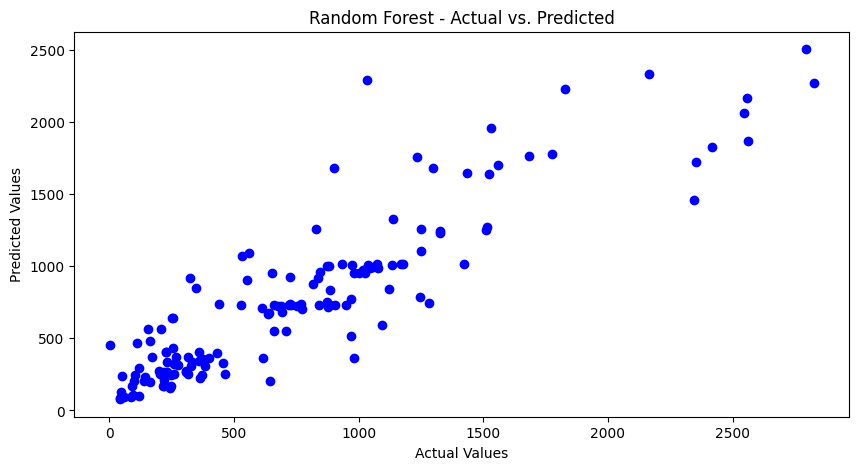

In [9]:
import matplotlib.pyplot as plt

# Initialize the Random Forest model with best hyperparameters
best_n_estimators = 100
best_max_depth = 5

model_rf_best = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Train the model
model_rf_best.fit(X_train, y_train)

# Predict using the model
y_pred_rf_best = model_rf_best.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf_best, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest - Actual vs. Predicted')
plt.show()

In [10]:
import joblib

# Define the file path for the model
model_file_path = "daily-bike-share.joblib"

# Export the model
joblib.dump(model_rf_best, model_file_path)

['daily-bike-share.joblib']